# Error Analysis of CRF Output Trained with Merged Data and 50d GloVe Word Embeddings

Start with imports:

In [1]:
import pandas as pd

In [2]:
%matplotlib inline

Read the file. Do not use pandas for it because of some lines in the data.

In [3]:
with open("merged_withBIO_dev.tsv", "r", encoding="utf-8") as data_handle:
        # read the lines
        gold_text = data_handle.readlines()
        print(len(gold_text))

115716


In [4]:
print(gold_text[:5])

['Word\tAR_label\n', 'Stealth\tO\n', 'Over\tO\n', 'Health\tO\n', ':\tO\n']


For example line 77028 is a tweet:

In [35]:
x = gold_text[77028]

print(len(x))
print(x)
print(type(x))

637
"&lt;tweetÂ tweet-author=""Â thatÂ inÂ anÂ apples-to-applesÂ comparison,Â African-AmericanÂ youthÂ haveÂ significantlyÂ worseÂ prospectsÂ inÂ theÂ jobÂ marketÂ thanÂ eitherÂ HispanicsÂ orÂ whitesÂ do.Â TheÂ statementÂ isÂ accurateÂ butÂ needsÂ clarificationÂ orÂ additionalÂ information,Â soÂ weÂ rateÂ itÂ MostlyÂ True""Â tweet-date=""thatÂ inÂ anÂ apples-to-applesÂ comparison,Â African-AmericanÂ youthÂ haveÂ significantlyÂ worseÂ prospectsÂ inÂ theÂ jobÂ marketÂ thanÂ eitherÂ HispanicsÂ orÂ whitesÂ do.Â TheÂ statementÂ isÂ accurateÂ butÂ needsÂ clarificationÂ orÂ additionalÂ information,Â soÂ weÂ rateÂ itÂ MostlyÂ True.""&gt;"	O

<class 'str'>


Create three lists: 

1. For pairs: Word + label
2. Only words
3. Only labels

In [11]:
gold_pair_list = []
gold_word_list = []
gold_label_list = []

for line in gold_text:
    line = line.strip()
    line = line.split()
    word = line[0]
    gold_word_list.append(word)
    #take -1 otherwise it fails to pick the label for lines like gold_text[77028].
    label = line[-1]
    gold_label_list.append(label)
    gold_pair = tuple(line)
    gold_pair_list.append(gold_pair)

Check the outputs:

In [37]:
print(len(gold_pair_list))
print(len(gold_word_list))
print(len(gold_label_list))

115716
115716
115716


In [38]:
print(gold_pair_list[:5])
print(gold_pair_list[77028])

[('Word', 'AR_label'), ('Stealth', 'O'), ('Over', 'O'), ('Health', 'O'), (':', 'O')]
('"&lt;tweetÂ', 'tweet-author=""Â', 'thatÂ', 'inÂ', 'anÂ', 'apples-to-applesÂ', 'comparison,Â', 'African-AmericanÂ', 'youthÂ', 'haveÂ', 'significantlyÂ', 'worseÂ', 'prospectsÂ', 'inÂ', 'theÂ', 'jobÂ', 'marketÂ', 'thanÂ', 'eitherÂ', 'HispanicsÂ', 'orÂ', 'whitesÂ', 'do.Â', 'TheÂ', 'statementÂ', 'isÂ', 'accurateÂ', 'butÂ', 'needsÂ', 'clarificationÂ', 'orÂ', 'additionalÂ', 'information,Â', 'soÂ', 'weÂ', 'rateÂ', 'itÂ', 'MostlyÂ', 'True""Â', 'tweet-date=""thatÂ', 'inÂ', 'anÂ', 'apples-to-applesÂ', 'comparison,Â', 'African-AmericanÂ', 'youthÂ', 'haveÂ', 'significantlyÂ', 'worseÂ', 'prospectsÂ', 'inÂ', 'theÂ', 'jobÂ', 'marketÂ', 'thanÂ', 'eitherÂ', 'HispanicsÂ', 'orÂ', 'whitesÂ', 'do.Â', 'TheÂ', 'statementÂ', 'isÂ', 'accurateÂ', 'butÂ', 'needsÂ', 'clarificationÂ', 'orÂ', 'additionalÂ', 'information,Â', 'soÂ', 'weÂ', 'rateÂ', 'itÂ', 'MostlyÂ', 'True.""&gt;"', 'O')


In [39]:
print(gold_word_list[:5])
print(gold_word_list[77028])

['Word', 'Stealth', 'Over', 'Health', ':']
"&lt;tweetÂ


In [17]:
print(gold_label_list[:5])

print(gold_label_list[77028])

['AR_label', 'O', 'O', 'O', 'O']
O


Apply the same procedure to model predictions file:

In [40]:
with open("merged_output_CRF_Embeddings.tsv", "r", encoding="utf-8") as data_handle:
        # read the lines
        pred_text = data_handle.readlines()
        print(len(pred_text))

115716


In [41]:
pred_pair_list = []
pred_word_list = []
pred_label_list = []

for line in pred_text:
    line = line.strip()
    line = line.split()
    word = line[0]
    pred_word_list.append(word)
    label = line[-1]
    pred_label_list.append(label)
    pred_pair = tuple(line)
    pred_pair_list.append(pred_pair)

In [43]:
print(len(pred_pair_list))
print(len(pred_word_list))
print(len(pred_label_list))
print(pred_pair_list[:5])
print(pred_word_list[:5])
print(pred_label_list[:5])

115716
115716
115716
[('word', 'O'), ('stealth', 'O'), ('over', 'O'), ('health', 'O'), (':', 'O')]
['word', 'stealth', 'over', 'health', ':']
['O', 'O', 'O', 'O', 'O']


Create a data frame:

In [45]:
df = pd.DataFrame(list(zip(gold_word_list, gold_label_list, pred_word_list, pred_label_list)),
               columns =['Gold_word', 'Gold_label', 'Pred_word', 'Pred_label'])
df

,Gold_word,Gold_label,Pred_word,Pred_label
0,Word,AR_label,word,O
1,Stealth,O,stealth,O
2,Over,O,over,O
3,Health,O,health,O
4,:,O,:,O
...,...,...,...,...
115711,them,I-CONTENT,them,I-CONTENT
115712,here,I-CONTENT,here,I-CONTENT
115713,with,I-CONTENT,with,I-CONTENT
115714,us,I-CONTENT,us,I-CONTENT


In [46]:
print(len(df.index))

115716


In order to be able to compare the columns, lowercase the Gold_word:

In [48]:
df["Gold_word"] = df["Gold_word"].apply(str.lower)

In [49]:
df

,Gold_word,Gold_label,Pred_word,Pred_label
0,word,AR_label,word,O
1,stealth,O,stealth,O
2,over,O,over,O
3,health,O,health,O
4,:,O,:,O
...,...,...,...,...
115711,them,I-CONTENT,them,I-CONTENT
115712,here,I-CONTENT,here,I-CONTENT
115713,with,I-CONTENT,with,I-CONTENT
115714,us,I-CONTENT,us,I-CONTENT


Compare the columns:

In [25]:
df['Gold_word'].equals(df['Pred_word'])

False

Find where the differences are:

In [26]:
df['Gold_word'].compare(df['Pred_word'])

,self,other
11675,"""&lt;tweetâ",&lt;tweetâ
77028,"""&lt;tweetâ",&lt;tweetâ
81496,"""&lt;tweetâ",&lt;tweetâ
81500,"""&lt;tweetâ",&lt;tweetâ
81504,"""&lt;tweetâ",&lt;tweetâ
81508,"""&lt;tweetâ",&lt;tweetâ
81759,"""""""""",""""
81767,"""""""""",""""
81840,"""""""""",""""
81863,"""""""""",""""


There is no real difference between the columns. Some lines with tweets and quatation marks result in different. Therefore, it is OK to drop the Pred_word column. 

In [50]:
df.drop(["Pred_word"], axis=1, inplace=True)

Now we can start comparing gold labels and system predictions:

In [51]:
df['Gold_label'].compare(df['Pred_label'])

,self,other
0,AR_label,O
58,B-CONTENT,O
59,I-CONTENT,O
60,I-CONTENT,O
61,I-CONTENT,O
...,...,...
115680,I-SOURCE,O
115681,I-SOURCE,O
115682,I-SOURCE,O
115683,I-SOURCE,O


It shows that the system makes 36389 predicitons which are different than gold. 

Create a new data frame with unmatching predictions: Errors

In [52]:
df_error = df.query('Gold_label != Pred_label')

In [53]:
df_error

,Gold_word,Gold_label,Pred_label
0,word,AR_label,O
58,hillary,B-CONTENT,O
59,clinton,I-CONTENT,O
60,was,I-CONTENT,O
61,headed,I-CONTENT,O
...,...,...,...
115680,who,I-SOURCE,O
115681,is,I-SOURCE,O
115682,now,I-SOURCE,O
115683,63,I-SOURCE,O


In [54]:
df_error.to_csv("error_analysis_merged_output", sep = '\t', index=False)

Just to make sure that labels are OK:

In [55]:
labels_error = set(df_error["Pred_label"].values.tolist())
print(labels_compare)

{'I-CUE', 'B-CUE', 'O', 'I-SOURCE', 'I-CONTENT', 'B-SOURCE', 'B-CONTENT'}


<AxesSubplot:>

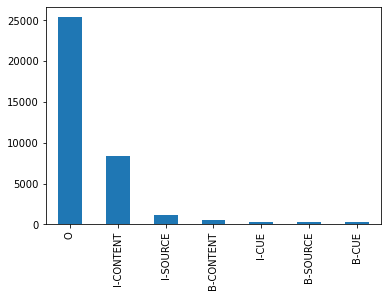

In [56]:
bins_error = df_error["Pred_label"].value_counts()
total_error = df_error["Pred_label"].count()
bins_error = bins_error.apply(lambda x: float(x)/total_error)

# Histogram of the classes
df_error["Pred_label"].value_counts().plot(kind="bar")

The bar chart above shows the distribution of errors per category.

#### Generate data frames per category:

In [57]:
df_O = df_error.loc[df_error['Pred_label'] == "O"]

In [58]:
df_O = df_O.sort_values(by=['Gold_label'])

In [59]:
df_O['Gold_label'].value_counts()

I-CONTENT    17859
I-SOURCE      2729
B-CONTENT     1303
I-CUE         1280
B-CUE         1132
B-SOURCE      1076
AR_label         1
Name: Gold_label, dtype: int64

In [60]:
df_O

,Gold_word,Gold_label,Pred_label
0,word,AR_label,O
33433,a,B-CONTENT,O
33456,it,B-CONTENT,O
77218,``,B-CONTENT,O
77173,the,B-CONTENT,O
...,...,...,...
105932,real,I-SOURCE,O
105933,estate,I-SOURCE,O
105934,and,I-SOURCE,O
83766,and,I-SOURCE,O


In [61]:
df_O.to_csv("errors_O", sep = '\t')

Continue with "I-CONTENT" category:

In [62]:
df_ICONTENT = df_error.loc[df_error['Pred_label'] == "I-CONTENT"]

In [63]:
df_ICONTENT = df_ICONTENT.sort_values(by=['Gold_label'])

In [64]:
df_ICONTENT['Gold_label'].value_counts()

O            6694
I-SOURCE      413
B-CONTENT     390
I-CUE         316
B-CUE         297
B-SOURCE      230
Name: Gold_label, dtype: int64

In [65]:
df_ICONTENT

,Gold_word,Gold_label,Pred_label
115624,to,B-CONTENT,I-CONTENT
14442,that,B-CONTENT,I-CONTENT
14473,trump,B-CONTENT,I-CONTENT
15008,donald,B-CONTENT,I-CONTENT
55491,connections,B-CONTENT,I-CONTENT
...,...,...,...
42046,exemplified,O,I-CONTENT
42045,is,O,I-CONTENT
42044,transparency,O,I-CONTENT
42371,has,O,I-CONTENT


In [66]:
df_ICONTENT.to_csv("errors_ICONTENT", sep = '\t')

Continue with "B-CONTENT" category:

In [67]:
df_BCONTENT = df_error.loc[df_error['Pred_label'] == "B-CONTENT"]

In [68]:
df_BCONTENT = df_BCONTENT.sort_values(by=['Gold_label'])

In [69]:
df_BCONTENT['Gold_label'].value_counts()

I-CONTENT    301
O            218
I-CUE         31
B-SOURCE      31
I-SOURCE       7
B-CUE          1
Name: Gold_label, dtype: int64

In [70]:
df_BCONTENT

,Gold_word,Gold_label,Pred_label
100236,to,B-CUE,B-CONTENT
55466,obama,B-SOURCE,B-CONTENT
25275,mrs.,B-SOURCE,B-CONTENT
55390,obama,B-SOURCE,B-CONTENT
73923,republican,B-SOURCE,B-CONTENT
...,...,...,...
45454,msnbc,O,B-CONTENT
74325,to,O,B-CONTENT
25311,by,O,B-CONTENT
6661,``,O,B-CONTENT


In [71]:
df_BCONTENT.to_csv("errors_BCONTENT", sep = '\t')

Continue with "I-CUE" category:

In [72]:
df_ICUE= df_error.loc[df_error['Pred_label'] == "I-CUE"]

In [73]:
df_ICUE = df_ICUE.sort_values(by=['Gold_label'])

In [74]:
df_ICUE['Gold_label'].value_counts()

I-CONTENT    152
O            120
B-CONTENT     52
B-CUE         19
I-SOURCE      14
B-SOURCE       1
Name: Gold_label, dtype: int64

In [75]:
df_ICUE

,Gold_word,Gold_label,Pred_label
60258,about,B-CONTENT,I-CUE
48073,no,B-CONTENT,I-CUE
4753,fbi,B-CONTENT,I-CUE
29777,not,B-CONTENT,I-CUE
4775,policies,B-CONTENT,I-CUE
...,...,...,...
34891,about,O,I-CUE
34890,worried,O,I-CUE
34889,be,O,I-CUE
63516,conference,O,I-CUE


In [76]:
df_ICUE.to_csv("errors_ICUE", sep = '\t')

Continue with "B-CUE" category:

In [77]:
df_BCUE= df_error.loc[df_error['Pred_label'] == "B-CUE"]

In [78]:
df_BCUE = df_BCUE.sort_values(by=['Gold_label'])

In [79]:
df_BCUE['Gold_label'].value_counts()

I-CONTENT    111
O             84
I-CUE         34
I-SOURCE      14
B-SOURCE       5
B-CONTENT      1
Name: Gold_label, dtype: int64

In [80]:
df_BCUE

,Gold_word,Gold_label,Pred_label
49776,to,B-CONTENT,B-CUE
88239,people,B-SOURCE,B-CUE
67863,according,B-SOURCE,B-CUE
14569,said,B-SOURCE,B-CUE
19242,said,B-SOURCE,B-CUE
...,...,...,...
45064,seemed,O,B-CUE
44341,promoting,O,B-CUE
44084,are,O,B-CUE
71213,unloaded,O,B-CUE


In [81]:
df_BCUE.to_csv("errors_BCUE", sep = '\t')

Continue with "I-SOURCE" category:

In [82]:
df_ISOURCE = df_error.loc[df_error['Pred_label'] == "I-SOURCE"]
df_ISOURCE = df_ISOURCE.sort_values(by=['Gold_label'])

In [83]:
df_ISOURCE['Gold_label'].value_counts()

O            768
I-CONTENT    247
I-CUE         51
B-SOURCE      40
B-CUE         38
B-CONTENT     30
Name: Gold_label, dtype: int64

In [84]:
df_ISOURCE

,Gold_word,Gold_label,Pred_label
9654,the,B-CONTENT,I-SOURCE
109689,the,B-CONTENT,I-SOURCE
52440,an,B-CONTENT,I-SOURCE
52708,it,B-CONTENT,I-SOURCE
15824,``,B-CONTENT,I-SOURCE
...,...,...,...
56314,to,O,I-SOURCE
56315,help,O,I-SOURCE
56316,fund,O,I-SOURCE
56306,forces,O,I-SOURCE


In [85]:
df_ISOURCE.to_csv("errors_ISOURCE", sep = '\t')

Continue with "B-SOURCE" category:

In [86]:
df_BSOURCE= df_error.loc[df_error['Pred_label'] == "B-SOURCE"]

df_BSOURCE = df_BSOURCE.sort_values(by=['Gold_label'])

In [87]:
df_BSOURCE['Gold_label'].value_counts()

O            119
I-CONTENT     67
I-SOURCE      56
B-CONTENT     50
B-CUE          4
I-CUE          3
Name: Gold_label, dtype: int64

In [88]:
df_BSOURCE

,Gold_word,Gold_label,Pred_label
208,clinton,B-CONTENT,B-SOURCE
49283,he,B-CONTENT,B-SOURCE
48206,they,B-CONTENT,B-SOURCE
42895,he,B-CONTENT,B-SOURCE
41676,which,B-CONTENT,B-SOURCE
...,...,...,...
61041,the,O,B-SOURCE
28962,my,O,B-SOURCE
59540,my,O,B-SOURCE
24850,it,O,B-SOURCE


In [89]:
df_BSOURCE.to_csv("errors_BSOURCE", sep = '\t')

End of the notebook.